## Exercise 3: Sales Analysis Data Preparation

In this activity, we will use pandas features to derive some insights from a sales dataset. This will prepare us to answer the following questions:Which month had the highest sale? What is the monthly sales trend?

#### Loading the dataset

In [45]:
# importing the necessary dependencies
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt

In [46]:
#1 load the "all_sales.csv" dataset
sales=pd.read_csv('C:/Users/user/Desktop/ITD112/Laboratory_Exercise_3/Datasets/all_sales.csv', delimiter=',')

In [47]:
#2 display the first 5 of the dataset
sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


The dataset contains: 
- Order ID
- Product
- Quantity Ordered
- Price
- Order Date
- Purchase Address

In [48]:
#3 display the information that contains the number of columns, column labels, column data types, 
#  memory usage, range index, and the number of cells in each column (non-null values).
sales_info = sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [49]:
#4 check the total number of blank rows
# Check for blank rows
blank_rows = sales.isnull().all(axis=1).sum()

# Display the total number of blank rows
print(f"Total number of blank rows: {blank_rows}")


Total number of blank rows: 545


In [50]:
#5 Remove all nulls/blanks using dropna() method.
# Remove all rows with null or blank values
sales = sales.dropna()

# Reset the index after dropping rows
sales = sales.reset_index(drop=True)

# Show the data
sales.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [51]:
#6 Create the 'Month' column from the 'Order Date' column using 
#  sales['Month'] = sales['Order Date'].str[0:2]
#  display the first 5 of the dataset

# Create the 'Month' column
sales['Month'] = sales['Order Date'].str[0:2]

# Display the first 5 rows of the dataset
sales.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [52]:
#7 Convert data type of Month Column from object to integer using 
#  sales['Month'] = sales['Month'].astype('int32')
#  There will be ValueError: invalid literal for int() with base 10: 'Or'

# Convert data type of Month Column from object to integer
sales['Month'] = sales['Month'].astype('int32', errors='ignore')

# Show data
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [53]:
#8 Create Or_dum dataframe to check the "Or's" in the Month Column using
#  Or_dump = sales[sales['Month']=="Or"]
#  display Or_dump first 5 rows
Or_dum = sales[sales['Month'] == "Or"]
Or_dum.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [54]:
#9 Remove "Or's" from the Month Column using
#  sales = sales[sales['Month']!='Or']
# Remove 'Or' values from the Month Column
sales = sales[sales['Month'] != 'Or']
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [55]:
#10 Check whether "Or's" from the Month Column still exist. (Or's must be gone)
# Check if 'Or's still exist in the Month Column
or_exist = any(sales['Month'] == 'Or')
print("Do 'Or's still exist in the Month Column?", or_exist)

Do 'Or's still exist in the Month Column? False


In [56]:
#10 Convert data type of Month Column from object to integer using 
#  sales['Month'] = sales['Month'].astype('int32')
#  There will be ValueError: invalid literal for int() with base 10: 'Or'
sales['Month'] = sales['Month'].astype('int32', errors='ignore')
sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [57]:
#11 check the new number of columns
#    display sales first 5 rows
# Check the number of columns
num_columns = sales.shape[1]
print(f"Number of columns: {num_columns}")

# Display the first 5 rows of the dataset
sales.head(5)

Number of columns: 7


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [58]:
#12 Convert Quantity Ordered and price each columns to the correct data type
#  sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
#  sales['Price Each'] = pd.to_numeric(sales['Price Each'])
#  display .info()
# Convert 'Quantity Ordered' to numeric
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors='coerce')

# Convert 'Price Each' to numeric
sales['Price Each'] = pd.to_numeric(sales['Price Each'], errors='coerce')

# Display information about the dataset
sales.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [59]:
#13 Add Cost column, where Cost = sales['Quantity Ordered'] * sales['Price Each']
#   display sales first 5 rows
# Add the 'Cost' column
sales['Cost'] = sales['Quantity Ordered'] * sales['Price Each']

# Display the first 5 rows of the updated dataset
sales.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Cost
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [60]:
# Ensure the 'Month' column is in integer format (if not already done)
sales['Month'] = sales['Month'].astype(int)

# Clean and convert the 'Cost' column to numeric
sales['Cost'] = pd.to_numeric(sales['Cost'], errors='coerce')

# Drop rows with NaN values in the 'Cost' column
sales.dropna(subset=['Cost'], inplace=True)

# Calculate the total cost for each month
monthly_total_cost = sales.groupby('Month')['Cost'].sum()

# Display the total cost for each month
print("Total Monthly Cost for Each Month:")
print(monthly_total_cost)

# Calculate the sum of total monthly cost
total_cost_sum = monthly_total_cost.sum()

# Display the sum of total monthly cost
print(f"Sum of Total Monthly Cost: {total_cost_sum}")

Total Monthly Cost for Each Month:
Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Cost, dtype: float64
Sum of Total Monthly Cost: 34492035.97


The final dataset must contain the following columns: 
- Order ID
- Product
- Quantity Ordered
- Price
- Order Date
- Purchase Address
- Month
- Cost

# GRAPH----------------------------------------------------------------------------------------------------


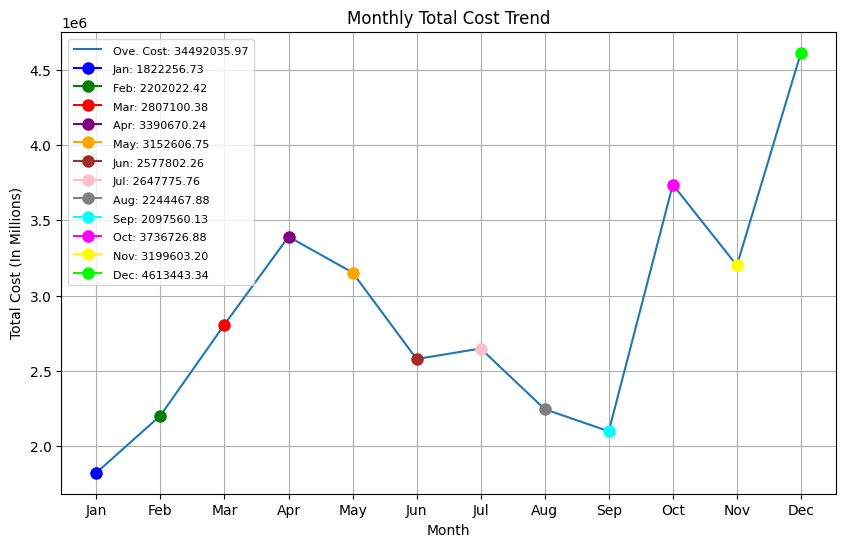

In [143]:
# Create a line plot to visualize the monthly total cost trend with different colors for dots
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_cost.index, monthly_total_cost.values, label=f'Ov. Cost: {total_cost_sum:.2f}')
plt.title('Monthly Total Cost Trend')
plt.xlabel('Month')
plt.ylabel('Total Cost (In Millions)')
plt.grid(True)

# Customize the x-axis labels with month abbreviations
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_total_cost.index, month_labels)

# Set different colors for the dots and create a legend with the desired format
dot_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'lime']

for i, color in enumerate(dot_colors):
    label = f'{month_labels[i]}: {monthly_total_cost.values[i]:.2f}'
    plt.plot(monthly_total_cost.index[i], monthly_total_cost.values[i], marker='o', color=color, markersize=8, label=label)

# Show the legend with a larger font size
legend = plt.legend()
for label in legend.get_texts():
    label.set_fontsize(6)

plt.show()